<h1>Objective :</h1>
<h3>The goal is to predict food delivery times based on customer location, restaurant location, weather, traffic, and other factors. This involves both data preprocessing and building predictive models using linear regression and logistic regression.</h3>

<h1>Phase 1<br>Data Collection and Exploratory Data Analysis</h1>
contains 3 steps

<h3>Step 1 - Data Import and Preprocessing</h3>

In [104]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc, classification_report
from scipy import stats

In [105]:
data=pd.read_csv('Food_Delivery_Time_prediction.csv')
d=data.copy()
d.head()

,Order_ID,Customer_Location,Restaurant_Location,Distance,Weather_Conditions,Traffic_Conditions,Delivery_Person_Experience,Order_Priority,Order_Time,Vehicle_Type,Restaurant_Rating,Customer_Rating,Delivery_Time,Order_Cost,Tip_Amount
0,ORD0001,"(17.030479, 79.743077)","(12.358515, 85.100083)",1.57,Rainy,Medium,4,Medium,Afternoon,Car,4.1,3.0,26.22,1321.10,81.54
1,ORD0002,"(15.398319, 86.639122)","(14.174874, 77.025606)",21.32,Cloudy,Medium,8,Low,Night,Car,4.5,4.2,62.61,152.21,29.02
2,ORD0003,"(15.687342, 83.888808)","(19.594748, 82.048482)",6.95,Snowy,Medium,9,High,Night,Bike,3.3,3.4,48.43,1644.38,64.17
3,ORD0004,"(20.415599, 78.046984)","(16.915906, 78.278698)",13.79,Cloudy,Low,2,Medium,Evening,Bike,3.2,3.7,111.63,541.25,79.23
4,ORD0005,"(14.786904, 78.706532)","(15.206038, 86.203182)",6.72,Rainy,High,6,Low,Night,Bike,3.5,2.8,32.38,619.81,2.34


In [106]:
d.isnull().sum()

Order_ID                      0
Customer_Location             0
Restaurant_Location           0
Distance                      0
Weather_Conditions            0
Traffic_Conditions            0
Delivery_Person_Experience    0
Order_Priority                0
Order_Time                    0
Vehicle_Type                  0
Restaurant_Rating             0
Customer_Rating               0
Delivery_Time                 0
Order_Cost                    0
Tip_Amount                    0
dtype: int64

Null values do not exist in any column<br>
Now checking for incorrect data

In [107]:
#drop duplicate and empty rows of Order_ID column
d.dropna(subset=['Order_ID'])
d.drop_duplicates(subset='Order_ID', keep='first')
# drop incorrect data for Order_ID column
d.drop(d[ d['Order_ID'].str.match(r'^ORD\d{4}$')==False ].index, inplace=True) 
# here if inplace=True not used then the changes will not be applied to the original dataframe 

#drop rows with null values in Customer_Location column
d.dropna(subset=['Customer_Location'], inplace=True)

#drop rows with null values in Restaurant_Location column
d.dropna(subset=['Restaurant_Location'], inplace=True)

# # distance values all greater than 0
# d.loc[d['Distance']<=0,'Distance']=np.mean(d[d['Distance']>0]['Distance'])

# fill null values in Weather_Conditions with 'Sunny'
# Weather_Conditions values should be one of the following
d['Weather_Conditions'].fillna('Sunny')
valid_weather_conditions = ['Sunny', 'Rainy', 'Snowy', 'Cloudy']
d.loc[~d['Weather_Conditions'].isin(valid_weather_conditions), 'Weather_Conditions'] = 'Sunny'

# fill null values in Traffic_Conditions with 'Medium'
# Traffic_Conditions values should be one of the following
d['Traffic_Conditions'].fillna('Medium')
valid_traffic_conditions = ['Low', 'Medium', 'High']
d.loc[~d['Traffic_Conditions'].isin(valid_traffic_conditions), 'Traffic_Condisions'] = 'Medium'

# # Deliver_Person_Experience values should be positive and non-zero
# d.loc[d['Delivery_Person_Experience']<=0,'Delivery_Person_Experience']=np.mean(d.loc[d['Delivery_Person_Experience']>0,'Delivery_Person_Experience'])

# fill null values in Order_Priority with 'Medium'
# Order_Priority values should be one of the following
d['Order_Priority'].fillna('Medium')
valid_order_priority = ['Low', 'Medium', 'High']
d.loc[~d['Order_Priority'].isin(valid_order_priority), 'Order_Priority'] = 'Medium'

# fill null values in Order_Time with 'Night'
# Order_Time values should be one of the following
d['Order_Time'].fillna('Night')
valid_order_time = ['Afternoon', 'Night', 'Evening', 'Morning']
d.loc[~d['Order_Time'].isin(valid_order_time), 'Order_Time'] = 'Night'

# fill null values in Vehicle_Type with 'Bike'
# Vehicle_Type values should be one of the following
d['Vehicle_Type'].fillna('Bike')
valid_vehicle_type = ['Car', 'Bike', 'Bicycle']
d.loc[~d['Vehicle_Type'].isin(valid_vehicle_type), 'Vehicle_Type'] = 'Bike'

# # Restaurant_Rating values all greater than 0
# d.loc[d['Restaurant_Rating']<=0,'Restaurant_Rating']=np.mean(d[d['Restaurant_Rating']>0]['Restaurant_Rating'])
# # Restaurant_Rating values all should be less than or equal to 5
# d.loc[d['Restaurant_Rating']>5,'Restaurant_Rating']=np.mean(d[(d['Restaurant_Rating'] >= 2.5) & (d['Restaurant_Rating'] < 5)]['Restaurant_Rating'])

# # Customer_Rating values all greater than 0
# d.loc[d['Customer_Rating']<=0,'Customer_Rating']=np.mean(d[d['Customer_Rating']>0]['Customer_Rating'])
# # Customer_Rating values all should be less than or equal to 5
# d.loc[d['Customer_Rating']>5,'Customer_Rating']=np.mean(d[(d['Customer_Rating'] >= 2.6) & (d['Customer_Rating'] < 5)]['Customer_Rating'])

# # Delivery_Time values all greater than 0
# d.loc[d['Delivery_Time']<=0,'Delivery_Time']=np.mean(d[d['Delivery_Time']>0]['Delivery_Time'])

# # Order_Cost values all greater than 0
# d.loc[d['Order_Cost']<=0,'Order_Cost']=np.mean(d[d['Order_Cost']>0]['Order_Cost'])

# # Tip_Amount values all greater than 0
# d.loc[d['Tip_Amount']<=0,'Tip_Amount']=np.mean(d[d['Tip_Amount']>0]['Tip_Amount'])


In [108]:
d

,Order_ID,Customer_Location,Restaurant_Location,Distance,Weather_Conditions,Traffic_Conditions,Delivery_Person_Experience,Order_Priority,Order_Time,Vehicle_Type,Restaurant_Rating,Customer_Rating,Delivery_Time,Order_Cost,Tip_Amount,Traffic_Condisions
0,ORD0001,"(17.030479, 79.743077)","(12.358515, 85.100083)",1.57,Rainy,Medium,4,Medium,Afternoon,Car,4.1,3.0,26.22,1321.10,81.54,NaN
1,ORD0002,"(15.398319, 86.639122)","(14.174874, 77.025606)",21.32,Cloudy,Medium,8,Low,Night,Car,4.5,4.2,62.61,152.21,29.02,NaN
2,ORD0003,"(15.687342, 83.888808)","(19.594748, 82.048482)",6.95,Snowy,Medium,9,High,Night,Bike,3.3,3.4,48.43,1644.38,64.17,NaN
3,ORD0004,"(20.415599, 78.046984)","(16.915906, 78.278698)",13.79,Cloudy,Low,2,Medium,Evening,Bike,3.2,3.7,111.63,541.25,79.23,NaN
4,ORD0005,"(14.786904, 78.706532)","(15.206038, 86.203182)",6.72,Rainy,High,6,Low,Night,Bike,3.5,2.8,32.38,619.81,2.34,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,ORD0196,"(17.910045, 81.56199)","(18.098924, 87.896124)",23.82,Cloudy,High,8,Medium,Night,Bike,4.7,4.0,50.39,1432.26,66.34,NaN
196,ORD0197,"(21.66459, 82.226635)","(16.892341, 80.554716)",6.09,Snowy,Medium,8,Low,Night,Bicycle,3.0,3.6,90.54,1720.25,40.27,NaN
197,ORD0198,"(14.575401, 82.55641)","(13.625369, 82.418092)",20.61,Snowy,High,4,Medium,Afternoon,Bike,2.9,3.4,73.20,1356.58,5.10,NaN
198,ORD0199,"(12.094497, 82.893369)","(19.135509, 86.659978)",24.06,Rainy,High,9,Low,Night,Car,3.9,4.8,53.94,354.39,85.25,NaN


In [109]:
# Setting numeric values to column Weather_Conditions
weather_map = {'Sunny': 0, 'Rainy': 1, 'Snowy': 2, 'Cloudy': 3}
d['Weather_Conditions'] = d['Weather_Conditions'].map(weather_map)

# Setting numeric values to column Traffic_Conditions
traffic_map = {'Low': 0, 'Medium': 1, 'High': 2}
d['Traffic_Conditions'] = d['Traffic_Conditions'].map(traffic_map)

# Setting numeric values to column Order_Priority
order_priority_map = {'Low': 0, 'Medium': 1, 'High': 2}
d['Order_Priority'] = d['Order_Priority'].map(order_priority_map)

# Setting numeric values to column Order_Time
order_time_map = {'Morning': 0, 'Afternoon': 1, 'Evening': 2, 'Night': 3}
d['Order_Time'] = d['Order_Time'].map(order_time_map)

# Setting numeric values to column Vehicle_Type
vehicle_type_map = {'Bicycle': 0, 'Bike': 1, 'Car': 2}
d['Vehicle_Type'] = d['Vehicle_Type'].map(vehicle_type_map)

In [110]:
d

,Order_ID,Customer_Location,Restaurant_Location,Distance,Weather_Conditions,Traffic_Conditions,Delivery_Person_Experience,Order_Priority,Order_Time,Vehicle_Type,Restaurant_Rating,Customer_Rating,Delivery_Time,Order_Cost,Tip_Amount,Traffic_Condisions
0,ORD0001,"(17.030479, 79.743077)","(12.358515, 85.100083)",1.57,1,1,4,1,1,2,4.1,3.0,26.22,1321.10,81.54,NaN
1,ORD0002,"(15.398319, 86.639122)","(14.174874, 77.025606)",21.32,3,1,8,0,3,2,4.5,4.2,62.61,152.21,29.02,NaN
2,ORD0003,"(15.687342, 83.888808)","(19.594748, 82.048482)",6.95,2,1,9,2,3,1,3.3,3.4,48.43,1644.38,64.17,NaN
3,ORD0004,"(20.415599, 78.046984)","(16.915906, 78.278698)",13.79,3,0,2,1,2,1,3.2,3.7,111.63,541.25,79.23,NaN
4,ORD0005,"(14.786904, 78.706532)","(15.206038, 86.203182)",6.72,1,2,6,0,3,1,3.5,2.8,32.38,619.81,2.34,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,ORD0196,"(17.910045, 81.56199)","(18.098924, 87.896124)",23.82,3,2,8,1,3,1,4.7,4.0,50.39,1432.26,66.34,NaN
196,ORD0197,"(21.66459, 82.226635)","(16.892341, 80.554716)",6.09,2,1,8,0,3,0,3.0,3.6,90.54,1720.25,40.27,NaN
197,ORD0198,"(14.575401, 82.55641)","(13.625369, 82.418092)",20.61,2,2,4,1,1,1,2.9,3.4,73.20,1356.58,5.10,NaN
198,ORD0199,"(12.094497, 82.893369)","(19.135509, 86.659978)",24.06,1,2,9,0,3,2,3.9,4.8,53.94,354.39,85.25,NaN


In [111]:
# Standardization
s=StandardScaler()
d['Distance_Scaled'] = s.fit_transform(d[['Distance']])
d['Delivery_Time_Scaled'] = s.fit_transform(d[['Delivery_Time']])
d['Order_Cost_Scaled'] = s.fit_transform(d[['Order_Cost']])
# StandardScaler().fit_transform() expects a 2D array or DataFrame, but you passed a Series (d['Distance']), which is 1D.
# So pass a DataFrame with double brackets d[['Distance']]

In [112]:
d

,Order_ID,Customer_Location,Restaurant_Location,Distance,Weather_Conditions,Traffic_Conditions,Delivery_Person_Experience,Order_Priority,Order_Time,Vehicle_Type,Restaurant_Rating,Customer_Rating,Delivery_Time,Order_Cost,Tip_Amount,Traffic_Condisions,Distance_Scaled,Delivery_Time_Scaled,Order_Cost_Scaled
0,ORD0001,"(17.030479, 79.743077)","(12.358515, 85.100083)",1.57,1,1,4,1,1,2,4.1,3.0,26.22,1321.10,81.54,NaN,-1.454738,-1.487932,0.501852
1,ORD0002,"(15.398319, 86.639122)","(14.174874, 77.025606)",21.32,3,1,8,0,3,2,4.5,4.2,62.61,152.21,29.02,NaN,1.439192,-0.264987,-1.634294
2,ORD0003,"(15.687342, 83.888808)","(19.594748, 82.048482)",6.95,2,1,9,2,3,1,3.3,3.4,48.43,1644.38,64.17,NaN,-0.666417,-0.741529,1.092646
3,ORD0004,"(20.415599, 78.046984)","(16.915906, 78.278698)",13.79,3,0,2,1,2,1,3.2,3.7,111.63,541.25,79.23,NaN,0.335835,1.382411,-0.923323
4,ORD0005,"(14.786904, 78.706532)","(15.206038, 86.203182)",6.72,1,2,6,0,3,1,3.5,2.8,32.38,619.81,2.34,NaN,-0.700119,-1.280915,-0.779755
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,ORD0196,"(17.910045, 81.56199)","(18.098924, 87.896124)",23.82,3,2,8,1,3,1,4.7,4.0,50.39,1432.26,66.34,NaN,1.805512,-0.675660,0.704997
196,ORD0197,"(21.66459, 82.226635)","(16.892341, 80.554716)",6.09,2,1,8,0,3,0,3.0,3.6,90.54,1720.25,40.27,NaN,-0.792431,0.673647,1.231298
197,ORD0198,"(14.575401, 82.55641)","(13.625369, 82.418092)",20.61,2,2,4,1,1,1,2.9,3.4,73.20,1356.58,5.10,NaN,1.335157,0.090908,0.566692
198,ORD0199,"(12.094497, 82.893369)","(19.135509, 86.659978)",24.06,1,2,9,0,3,2,3.9,4.8,53.94,354.39,85.25,NaN,1.840679,-0.556356,-1.264810


<h3>Step 2 - Exploratory Data Analysis (EDA)</h3>

In [113]:
# keepdims=True makes sure the result is always an array, even if there is only one mode.
# Without keepdims=True, the output might be a scalar if the input is 1D, which can sometimes cause issues in further processing.

dist_mean=np.mean(d['Distance'])
dist_mode=stats.mode(d['Distance'], keepdims=True).mode[0]
dist_median=np.median(d['Distance'])
dist_var=np.var(d['Distance'])

weather_mode = stats.mode(d['Weather_Conditions'], keepdims=True).mode[0]
weather_median = np.median(d['Weather_Conditions'])

Traffic_mode = stats.mode(d['Traffic_Conditions'], keepdims=True).mode[0]
Traffic_median = np.median(d['Traffic_Conditions'])

delivery_person_experience_mean=np.mean(d['Delivery_Person_Experience'])
delivery_person_experience_mode=stats.mode(d['Delivery_Person_Experience'], keepdims=True).mode[0]
delivery_person_experience_median=np.median(d['Delivery_Person_Experience'])
delivery_person_experience_var=np.var(d['Delivery_Person_Experience'])

Order_priority_mode = stats.mode(d['Order_Priority'], keepdims=True).mode[0]
Order_priority_median = np.median(d['Order_Priority'])

Order_time_mode = stats.mode(d['Order_Time'], keepdims=True).mode[0]
Order_time_median = np.median(d['Order_Time'])

Vehicle_Type_mode = stats.mode(d['Vehicle_Type'], keepdims=True).mode[0]
Vehicle_Type_median = np.median(d['Vehicle_Type'])

restaurant_rating_mean=np.mean(d['Restaurant_Rating'])
restaurant_rating_mode=stats.mode(d['Restaurant_Rating'], keepdims=True).mode[0]
restaurant_rating_median=np.median(d['Restaurant_Rating'])
restaurant_rating_var=np.var(d['Delivery_Person_Experience'])

customer_rating_mean=np.mean(d['Customer_Rating'])
customer_rating_mode=stats.mode(d['Customer_Rating'], keepdims=True).mode[0]
customer_rating_median=np.median(d['Customer_Rating'])
customer_rating_var=np.var(d['Customer_Rating'])

Delivery_Time_mean=np.mean(d['Delivery_Time'])
Delivery_Time_mode=stats.mode(d['Delivery_Time'], keepdims=True).mode[0]
Delivery_Time_median=np.median(d['Delivery_Time'])
Delivery_Time_var=np.var(d['Delivery_Time'])

Order_Cost_mean=np.mean(d['Delivery_Time'])
Order_Cost_mode=stats.mode(d['Delivery_Time'], keepdims=True).mode[0]
Order_Cost_median=np.median(d['Order_Cost'])
Order_Cost_var=np.var(d['Order_Cost'])

Tip_Amount_mean=np.mean(d['Tip_Amount'])
Tip_Amount_mode=stats.mode(d['Tip_Amount'], keepdims=True).mode[0]
Tip_Amount_median=np.median(d['Tip_Amount'])
Tip_Amount_var=np.var(d['Tip_Amount'])

In [114]:
print('Mean of Distance : ', dist_mean)
print('Median of Distance : ', dist_median)
print('Mode of Distance : ', dist_mode)
print('Variance of Distance : ', dist_var)

print('')
print('Mode of Weather_Conditions : ', weather_mode)
print('Median of Weather_Conditions : ', weather_median)

print('')
print('Mode of Traffic_Conditions : ', Traffic_mode)
print('Median of Traffic_Conditions : ', Traffic_median)

print('')
print('Mean of Delivery_Person_Experience : ', delivery_person_experience_mean)
print('Median of Delivery_Person_Experience : ', delivery_person_experience_median)
print('Mode of Delivery_Person_Experience : ', delivery_person_experience_mode)
print('Variance of Delivery_Person_Experience : ', delivery_person_experience_var)

print('')
print('Mode of Order_Priority : ', Order_priority_mode)
print('Median of Order_Priority : ', Order_priority_median)

print('')
print('Mode of Order_Time : ', Order_time_mode)
print('Median of Order_Time : ', Order_time_median)

print('')
print('Mode of Vehicle_Type : ', Vehicle_Type_mode)
print('Median of Vehicle_Type : ', Vehicle_Type_median)

print('')
print('Mean of Restaurant_Rating : ', restaurant_rating_mean)
print('Median of Restaurant_Rating : ', restaurant_rating_median)
print('Mode of Restaurant_Rating : ', restaurant_rating_mode)
print('Variance of Restaurant_Rating : ', restaurant_rating_var)

print('')
print('Mean of Customer_Rating : ', customer_rating_mean)
print('Median of Customer_Rating : ', customer_rating_median)
print('Mode of Customer_Rating : ', customer_rating_mode)
print('Variance of Customer_Rating : ', customer_rating_var)

print('')
print('Mean of Delivery_Time : ', Delivery_Time_mean)
print('Median of Delivery_Time : ', Delivery_Time_median)
print('Mode of Delivery_Time : ', Delivery_Time_mode)
print('Variance of Delivery_Time : ', Delivery_Time_var)

print('')
print('Mean of Order_Cost : ', Order_Cost_mean)
print('Median of Order_Cost : ', Order_Cost_median)
print('Mode of Order_Cost : ', Order_Cost_mode)
print('Variance of Order_Cost : ', Order_Cost_var)

print('')
print('Mean of Tip_Amount : ', Tip_Amount_mean)
print('Median of Tip_Amount : ', Tip_Amount_median)
print('Mode of Tip_Amount : ', Tip_Amount_mode)
print('Variance of Tip_Amount : ', Tip_Amount_var)

Mean of Distance :  11.498050000000001
Median of Distance :  10.265
Mode of Distance :  1.32
Variance of Distance :  46.5755686975

Mode of Weather_Conditions :  1
Median of Weather_Conditions :  1.0

Mode of Traffic_Conditions :  0
Median of Traffic_Conditions :  1.0

Mean of Delivery_Person_Experience :  5.25
Median of Delivery_Person_Experience :  5.0
Mode of Delivery_Person_Experience :  8
Variance of Delivery_Person_Experience :  7.4975

Mode of Order_Priority :  0
Median of Order_Priority :  1.0

Mode of Order_Time :  1
Median of Order_Time :  2.0

Mode of Vehicle_Type :  0
Median of Vehicle_Type :  1.0

Mean of Restaurant_Rating :  3.7384999999999997
Median of Restaurant_Rating :  3.8
Mode of Restaurant_Rating :  3.8
Variance of Restaurant_Rating :  7.4975

Mean of Customer_Rating :  3.6864999999999997
Median of Customer_Rating :  3.7
Mode of Customer_Rating :  2.6
Variance of Customer_Rating :  0.4834677499999999

Mean of Delivery_Time :  70.49494999999999
Median of Delivery_Ti

Annot value in matrix greater than 0.05 both + and - then they have importance or correlation or dependancy with each other<br>
more the value more they are correlated

A negative correlation means that as one variable increases, the other decreases<br>
A positive correlation means that as one variable increases, the other also increases

Feature means column

There is a target_feature and other features<br>
If among other features if they are highly correlated (+ve) (more than 0.9 or values greater than 0.7 or 0.8) with each other then among them only one of them should be kept and drop the other(s)

A feature highly correlated with target_feature should not be removed

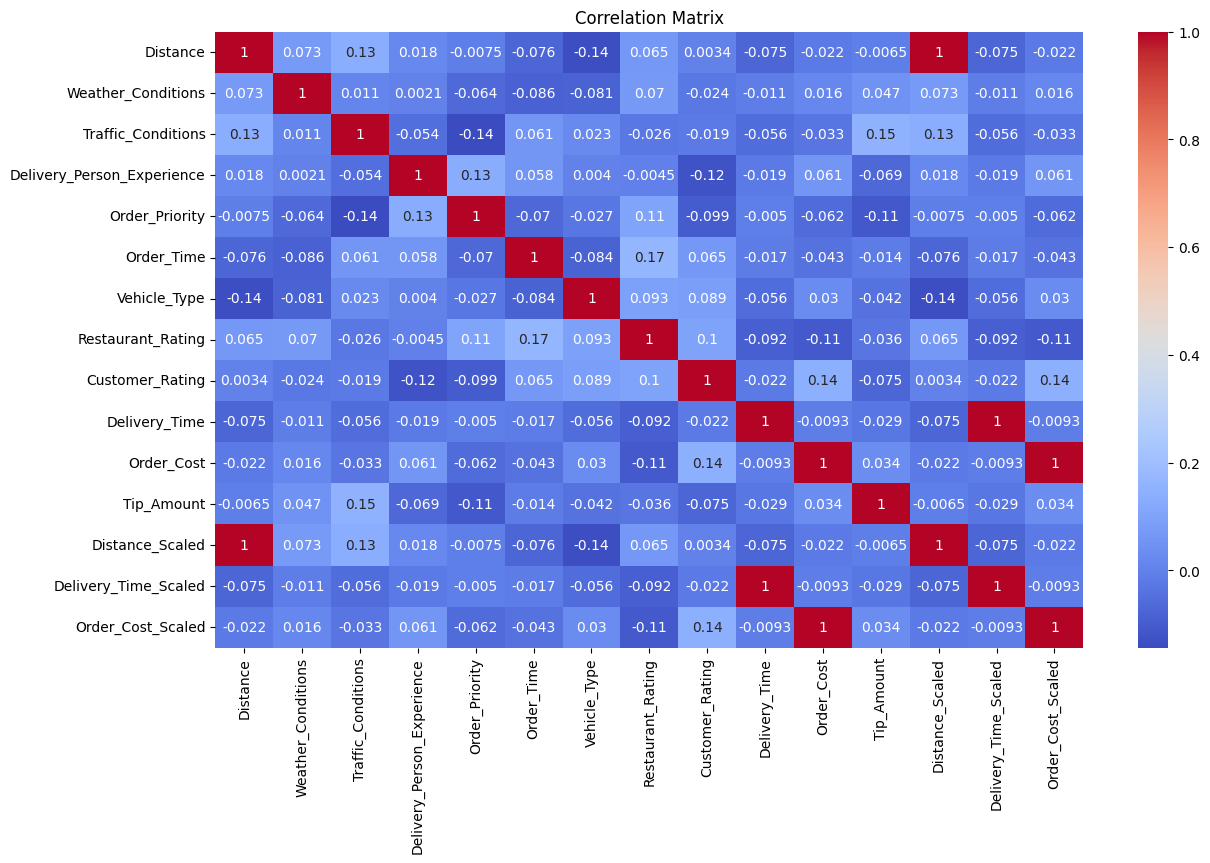

Correlation of features with Delivery_Time : 
Restaurant_Rating            -0.091855
Distance                     -0.075143
Distance_Scaled              -0.075143
Traffic_Conditions           -0.055840
Vehicle_Type                 -0.055576
Tip_Amount                   -0.029154
Customer_Rating              -0.021952
Delivery_Person_Experience   -0.019098
Order_Time                   -0.017476
Weather_Conditions           -0.010518
Order_Cost_Scaled            -0.009307
Order_Cost                   -0.009307
Order_Priority               -0.004982
Delivery_Time_Scaled          1.000000
Delivery_Time                 1.000000
Name: Delivery_Time, dtype: float64


In [115]:
correlation_matrix = d.corr(numeric_only=True)
plt.figure(figsize=(14, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Table
correlation_with_target = correlation_matrix['Delivery_Time'].sort_values()
print("Correlation of features with Delivery_Time : ")
print(correlation_with_target)

Outliers -> some values that are either too big or too small than the most of the values in that column

They affect the output soo much<br>
Output that should have come is affected

Z-score or IQR method is used to remove outliers

In [116]:
d

,Order_ID,Customer_Location,Restaurant_Location,Distance,Weather_Conditions,Traffic_Conditions,Delivery_Person_Experience,Order_Priority,Order_Time,Vehicle_Type,Restaurant_Rating,Customer_Rating,Delivery_Time,Order_Cost,Tip_Amount,Traffic_Condisions,Distance_Scaled,Delivery_Time_Scaled,Order_Cost_Scaled
0,ORD0001,"(17.030479, 79.743077)","(12.358515, 85.100083)",1.57,1,1,4,1,1,2,4.1,3.0,26.22,1321.10,81.54,NaN,-1.454738,-1.487932,0.501852
1,ORD0002,"(15.398319, 86.639122)","(14.174874, 77.025606)",21.32,3,1,8,0,3,2,4.5,4.2,62.61,152.21,29.02,NaN,1.439192,-0.264987,-1.634294
2,ORD0003,"(15.687342, 83.888808)","(19.594748, 82.048482)",6.95,2,1,9,2,3,1,3.3,3.4,48.43,1644.38,64.17,NaN,-0.666417,-0.741529,1.092646
3,ORD0004,"(20.415599, 78.046984)","(16.915906, 78.278698)",13.79,3,0,2,1,2,1,3.2,3.7,111.63,541.25,79.23,NaN,0.335835,1.382411,-0.923323
4,ORD0005,"(14.786904, 78.706532)","(15.206038, 86.203182)",6.72,1,2,6,0,3,1,3.5,2.8,32.38,619.81,2.34,NaN,-0.700119,-1.280915,-0.779755
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,ORD0196,"(17.910045, 81.56199)","(18.098924, 87.896124)",23.82,3,2,8,1,3,1,4.7,4.0,50.39,1432.26,66.34,NaN,1.805512,-0.675660,0.704997
196,ORD0197,"(21.66459, 82.226635)","(16.892341, 80.554716)",6.09,2,1,8,0,3,0,3.0,3.6,90.54,1720.25,40.27,NaN,-0.792431,0.673647,1.231298
197,ORD0198,"(14.575401, 82.55641)","(13.625369, 82.418092)",20.61,2,2,4,1,1,1,2.9,3.4,73.20,1356.58,5.10,NaN,1.335157,0.090908,0.566692
198,ORD0199,"(12.094497, 82.893369)","(19.135509, 86.659978)",24.06,1,2,9,0,3,2,3.9,4.8,53.94,354.39,85.25,NaN,1.840679,-0.556356,-1.264810


To see outliers clearly using box plot

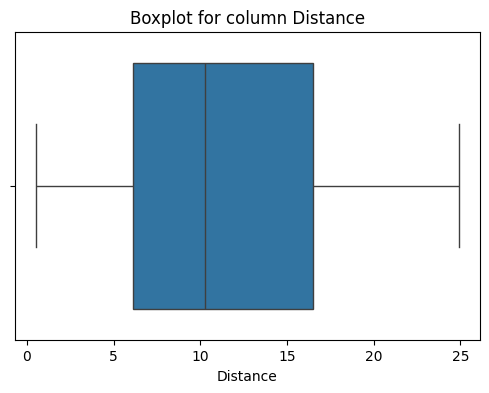

In [117]:
plt.figure(figsize=(6, 4))
sns.boxplot(x=d['Distance'])
plt.title('Boxplot for column Distance')
plt.show()

No outliers for column Distance

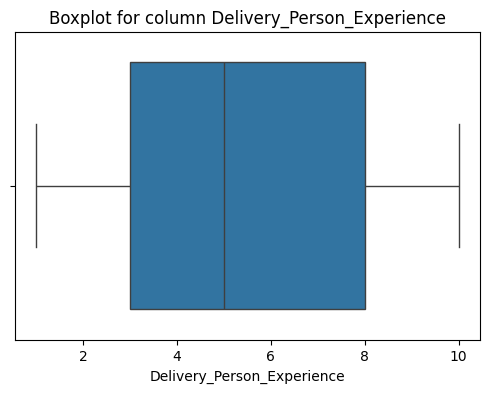

In [118]:
plt.figure(figsize=(6, 4))
sns.boxplot(x=d['Delivery_Person_Experience'])
plt.title('Boxplot for column Delivery_Person_Experience')
plt.show()

No outliers for column Delivery_Person_Experience

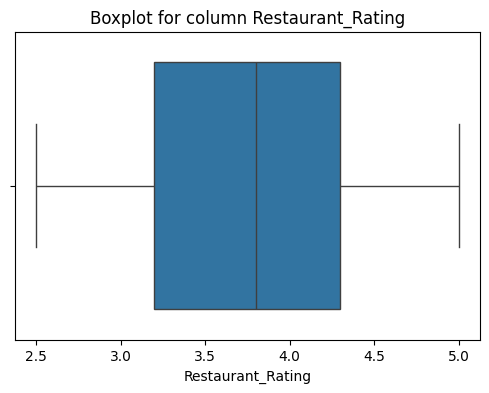

In [119]:
plt.figure(figsize=(6, 4))
sns.boxplot(x=d['Restaurant_Rating'])
plt.title('Boxplot for column Restaurant_Rating')
plt.show()

No outliers for column Restaurant_Rating

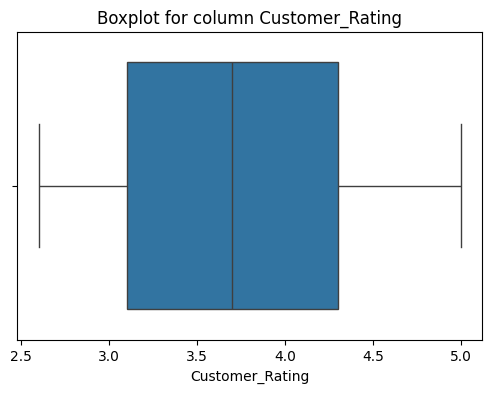

In [120]:
plt.figure(figsize=(6, 4))
sns.boxplot(x=d['Customer_Rating'])
plt.title('Boxplot for column Customer_Rating')
plt.show()

No outliers for column Customer_Rating

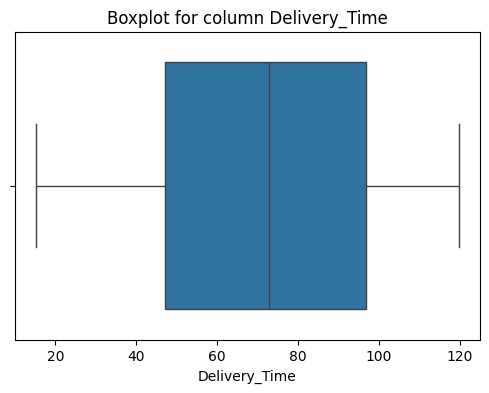

In [121]:
plt.figure(figsize=(6, 4))
sns.boxplot(x=d['Delivery_Time'])
plt.title('Boxplot for column Delivery_Time')
plt.show()

No outliers for column Delivery_Time

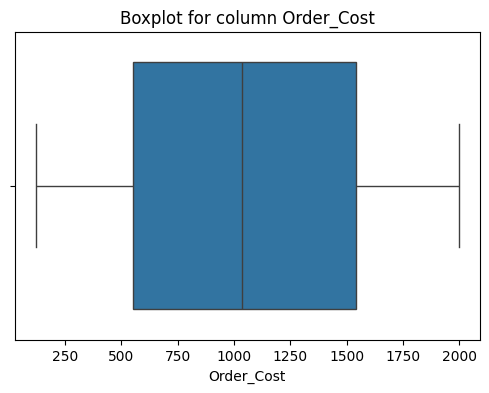

In [122]:
plt.figure(figsize=(6, 4))
sns.boxplot(x=d['Order_Cost'])
plt.title('Boxplot for column Order_Cost')
plt.show()

No outliers for column Order_Cost

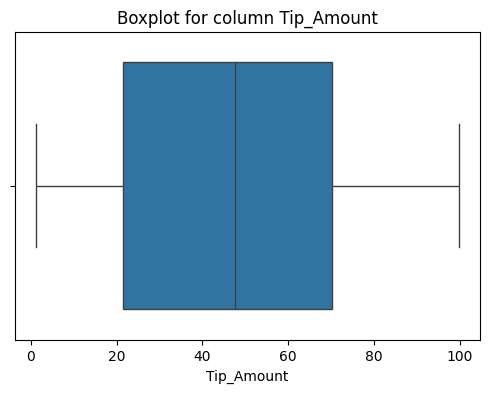

In [123]:
plt.figure(figsize=(6, 4))
sns.boxplot(x=d['Tip_Amount'])
plt.title('Boxplot for column Tip_Amount')
plt.show()

No outliers for column Tip_Amount

None of the columns have outliers

<h3>Step 3 - Feature Engineering</h3>

In [124]:
def haversine_formula(coords_array1, coords_array2):
    lat1 = coords_array1[:,0]
    lon1 = coords_array1[:,1]
    lat2 = coords_array2[:,0]
    lon2 = coords_array2[:,1]
    # Convert decimal degrees to radians 
    lat1=np.radians(lat1)
    lon1=np.radians(lon1)
    lat2=np.radians(lat2)
    lon2=np.radians(lon2)
    # Haversine formula 
    lat_diff = lat2 - lat1 
    lon_diff = lon2 - lon1 
    a = np.sin(lat_diff/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(lon_diff/2)**2
    c = 2 * np.asin(np.sqrt(a)) 
    r = 6371  # Radius of earth in km
    return c * r

def parse_location(loc_str):
    # Remove parentheses and split by comma
    lat, lon = loc_str.strip("()").split(",")
    return float(lat), float(lon)

coords_array1 = d['Customer_Location'].apply(parse_location).tolist()
coords_array1 = np.array(coords_array1)

coords_array2 = d['Restaurant_Location'].apply(parse_location).tolist()
coords_array2 = np.array(coords_array2)

d['Calculated_Distance'] = haversine_formula(coords_array1, coords_array2)

In [125]:
d[['Calculated_Distance']]

,Calculated_Distance
0,775.651198
1,1042.385597
2,476.220706
3,389.912629
4,806.505886
...,...
195,670.130652
196,558.891202
197,106.686689
198,880.580093


In [126]:
d

,Order_ID,Customer_Location,Restaurant_Location,Distance,Weather_Conditions,Traffic_Conditions,Delivery_Person_Experience,Order_Priority,Order_Time,Vehicle_Type,Restaurant_Rating,Customer_Rating,Delivery_Time,Order_Cost,Tip_Amount,Traffic_Condisions,Distance_Scaled,Delivery_Time_Scaled,Order_Cost_Scaled,Calculated_Distance
0,ORD0001,"(17.030479, 79.743077)","(12.358515, 85.100083)",1.57,1,1,4,1,1,2,4.1,3.0,26.22,1321.10,81.54,NaN,-1.454738,-1.487932,0.501852,775.651198
1,ORD0002,"(15.398319, 86.639122)","(14.174874, 77.025606)",21.32,3,1,8,0,3,2,4.5,4.2,62.61,152.21,29.02,NaN,1.439192,-0.264987,-1.634294,1042.385597
2,ORD0003,"(15.687342, 83.888808)","(19.594748, 82.048482)",6.95,2,1,9,2,3,1,3.3,3.4,48.43,1644.38,64.17,NaN,-0.666417,-0.741529,1.092646,476.220706
3,ORD0004,"(20.415599, 78.046984)","(16.915906, 78.278698)",13.79,3,0,2,1,2,1,3.2,3.7,111.63,541.25,79.23,NaN,0.335835,1.382411,-0.923323,389.912629
4,ORD0005,"(14.786904, 78.706532)","(15.206038, 86.203182)",6.72,1,2,6,0,3,1,3.5,2.8,32.38,619.81,2.34,NaN,-0.700119,-1.280915,-0.779755,806.505886
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,ORD0196,"(17.910045, 81.56199)","(18.098924, 87.896124)",23.82,3,2,8,1,3,1,4.7,4.0,50.39,1432.26,66.34,NaN,1.805512,-0.675660,0.704997,670.130652
196,ORD0197,"(21.66459, 82.226635)","(16.892341, 80.554716)",6.09,2,1,8,0,3,0,3.0,3.6,90.54,1720.25,40.27,NaN,-0.792431,0.673647,1.231298,558.891202
197,ORD0198,"(14.575401, 82.55641)","(13.625369, 82.418092)",20.61,2,2,4,1,1,1,2.9,3.4,73.20,1356.58,5.10,NaN,1.335157,0.090908,0.566692,106.686689
198,ORD0199,"(12.094497, 82.893369)","(19.135509, 86.659978)",24.06,1,2,9,0,3,2,3.9,4.8,53.94,354.39,85.25,NaN,1.840679,-0.556356,-1.264810,880.580093


In [127]:
d["Order_Time"].unique()

array([1, 3, 2, 0])

In [128]:
print(np.sum(d['Order_Time']==0))
print(np.sum(d['Order_Time']==1))
print(np.sum(d['Order_Time']==2))
print(np.sum(d['Order_Time']==3))

39
59
57
45


In [129]:
d.loc[(d['Order_Time'] == 1) | (d['Order_Time'] == 2), 'Hour_Type'] = 'Rush Hour'
d.loc[(d['Order_Time'] == 0) | (d['Order_Time'] == 3), 'Hour_Type'] = 'Non-Rush Hour'
d[['Hour_Type']]

,Hour_Type
0,Rush Hour
1,Non-Rush Hour
2,Non-Rush Hour
3,Rush Hour
4,Non-Rush Hour
...,...
195,Non-Rush Hour
196,Non-Rush Hour
197,Rush Hour
198,Non-Rush Hour


In [130]:
# Setting numeric values to column Hour_Type
Hour_Type_map = {'Non-Rush Hour': 0, 'Rush Hour': 1}
d['Hour_Type'] = d['Hour_Type'].map(Hour_Type_map)
d[['Hour_Type']]

,Hour_Type
0,1
1,0
2,0
3,1
4,0
...,...
195,0
196,0
197,1
198,0


<h1>Phase 2<br>Predictive Modeling</h1>contains 2 steps

<h3>Step 4 - Linear Regression Model
</h3>

In [131]:
d

,Order_ID,Customer_Location,Restaurant_Location,Distance,Weather_Conditions,Traffic_Conditions,Delivery_Person_Experience,Order_Priority,Order_Time,Vehicle_Type,Restaurant_Rating,Customer_Rating,Delivery_Time,Order_Cost,Tip_Amount,Traffic_Condisions,Distance_Scaled,Delivery_Time_Scaled,Order_Cost_Scaled,Calculated_Distance,Hour_Type
0,ORD0001,"(17.030479, 79.743077)","(12.358515, 85.100083)",1.57,1,1,4,1,1,2,4.1,3.0,26.22,1321.10,81.54,NaN,-1.454738,-1.487932,0.501852,775.651198,1
1,ORD0002,"(15.398319, 86.639122)","(14.174874, 77.025606)",21.32,3,1,8,0,3,2,4.5,4.2,62.61,152.21,29.02,NaN,1.439192,-0.264987,-1.634294,1042.385597,0
2,ORD0003,"(15.687342, 83.888808)","(19.594748, 82.048482)",6.95,2,1,9,2,3,1,3.3,3.4,48.43,1644.38,64.17,NaN,-0.666417,-0.741529,1.092646,476.220706,0
3,ORD0004,"(20.415599, 78.046984)","(16.915906, 78.278698)",13.79,3,0,2,1,2,1,3.2,3.7,111.63,541.25,79.23,NaN,0.335835,1.382411,-0.923323,389.912629,1
4,ORD0005,"(14.786904, 78.706532)","(15.206038, 86.203182)",6.72,1,2,6,0,3,1,3.5,2.8,32.38,619.81,2.34,NaN,-0.700119,-1.280915,-0.779755,806.505886,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,ORD0196,"(17.910045, 81.56199)","(18.098924, 87.896124)",23.82,3,2,8,1,3,1,4.7,4.0,50.39,1432.26,66.34,NaN,1.805512,-0.675660,0.704997,670.130652,0
196,ORD0197,"(21.66459, 82.226635)","(16.892341, 80.554716)",6.09,2,1,8,0,3,0,3.0,3.6,90.54,1720.25,40.27,NaN,-0.792431,0.673647,1.231298,558.891202,0
197,ORD0198,"(14.575401, 82.55641)","(13.625369, 82.418092)",20.61,2,2,4,1,1,1,2.9,3.4,73.20,1356.58,5.10,NaN,1.335157,0.090908,0.566692,106.686689,1
198,ORD0199,"(12.094497, 82.893369)","(19.135509, 86.659978)",24.06,1,2,9,0,3,2,3.9,4.8,53.94,354.39,85.25,NaN,1.840679,-0.556356,-1.264810,880.580093,0


In [132]:
features1=['Calculated_Distance', 'Order_Priority', 'Hour_Type', 'Traffic_Conditions', 'Distance', 'Weather_Conditions', 'Order_Time', 'Vehicle_Type']
x1 = d[features1]
y1 = d['Delivery_Time'].values.reshape(-1,1)

In [133]:
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size=0.2, random_state=42)

In [134]:
model1=LinearRegression()
model1.fit(x1_train, y1_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [135]:
y1_pred=model1.predict(x1_test)
y1_pred

array([[65.38769861],
       [69.91274107],
       [76.85336904],
       [70.38494607],
       [73.17633753],
       [75.13550136],
       [74.60017305],
       [70.70943681],
       [79.05965283],
       [65.72732621],
       [61.58958746],
       [68.54998666],
       [63.02809109],
       [79.96379449],
       [75.15506435],
       [66.55010947],
       [65.01215338],
       [68.94450298],
       [64.00757063],
       [77.0237123 ],
       [72.77246244],
       [66.73099907],
       [66.75165826],
       [67.10549902],
       [69.54848976],
       [68.5129306 ],
       [68.4822748 ],
       [68.89987917],
       [64.36055246],
       [75.85486299],
       [70.98672602],
       [70.15976751],
       [74.13732224],
       [69.20527439],
       [68.15818663],
       [76.71161811],
       [73.29715265],
       [72.52772064],
       [65.38620191],
       [79.20417865]])

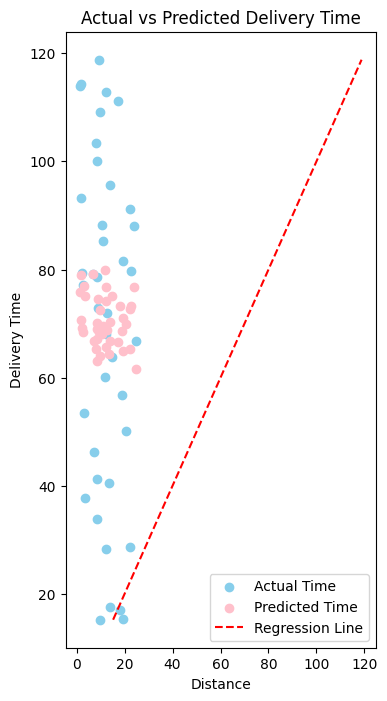

In [136]:
plt.figure(figsize=(4,8))
plt.scatter(x1_test['Distance'], y1_test, color='skyblue', label='Actual Time')
plt.scatter(x1_test['Distance'], y1_pred, color='pink', label='Predicted Time')
plt.plot([y1_test.min(), y1_test.max()], [y1_test.min(), y1_test.max()], 'r--', label='Regression Line')  # Reference line
plt.xlabel('Distance')
plt.ylabel('Delivery Time')
plt.legend()
plt.title('Actual vs Predicted Delivery Time')
plt.show()

In [137]:
mse = mean_squared_error(y1_test, y1_pred)
r2_score = model1.score(x1_test, y1_test)
mae = mean_absolute_error(y1_test, y1_pred)

print('Mean Squared Error : ', mse)
print('R sqyared (Accuracy for regression) : ', r2_score)
print('Mean Absolute Error : ', mae)

Mean Squared Error :  888.6648291609388
R sqyared (Accuracy for regression) :  0.03916826098779047
Mean Absolute Error :  25.33245221650145


<h3>Step 5 - Logistic Regression Model (for Categorization)</h3>

In [138]:
d

,Order_ID,Customer_Location,Restaurant_Location,Distance,Weather_Conditions,Traffic_Conditions,Delivery_Person_Experience,Order_Priority,Order_Time,Vehicle_Type,Restaurant_Rating,Customer_Rating,Delivery_Time,Order_Cost,Tip_Amount,Traffic_Condisions,Distance_Scaled,Delivery_Time_Scaled,Order_Cost_Scaled,Calculated_Distance,Hour_Type
0,ORD0001,"(17.030479, 79.743077)","(12.358515, 85.100083)",1.57,1,1,4,1,1,2,4.1,3.0,26.22,1321.10,81.54,NaN,-1.454738,-1.487932,0.501852,775.651198,1
1,ORD0002,"(15.398319, 86.639122)","(14.174874, 77.025606)",21.32,3,1,8,0,3,2,4.5,4.2,62.61,152.21,29.02,NaN,1.439192,-0.264987,-1.634294,1042.385597,0
2,ORD0003,"(15.687342, 83.888808)","(19.594748, 82.048482)",6.95,2,1,9,2,3,1,3.3,3.4,48.43,1644.38,64.17,NaN,-0.666417,-0.741529,1.092646,476.220706,0
3,ORD0004,"(20.415599, 78.046984)","(16.915906, 78.278698)",13.79,3,0,2,1,2,1,3.2,3.7,111.63,541.25,79.23,NaN,0.335835,1.382411,-0.923323,389.912629,1
4,ORD0005,"(14.786904, 78.706532)","(15.206038, 86.203182)",6.72,1,2,6,0,3,1,3.5,2.8,32.38,619.81,2.34,NaN,-0.700119,-1.280915,-0.779755,806.505886,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,ORD0196,"(17.910045, 81.56199)","(18.098924, 87.896124)",23.82,3,2,8,1,3,1,4.7,4.0,50.39,1432.26,66.34,NaN,1.805512,-0.675660,0.704997,670.130652,0
196,ORD0197,"(21.66459, 82.226635)","(16.892341, 80.554716)",6.09,2,1,8,0,3,0,3.0,3.6,90.54,1720.25,40.27,NaN,-0.792431,0.673647,1.231298,558.891202,0
197,ORD0198,"(14.575401, 82.55641)","(13.625369, 82.418092)",20.61,2,2,4,1,1,1,2.9,3.4,73.20,1356.58,5.10,NaN,1.335157,0.090908,0.566692,106.686689,1
198,ORD0199,"(12.094497, 82.893369)","(19.135509, 86.659978)",24.06,1,2,9,0,3,2,3.9,4.8,53.94,354.39,85.25,NaN,1.840679,-0.556356,-1.264810,880.580093,0


In [139]:
d.loc[d['Delivery_Time']>=Delivery_Time_median,'Delivery_Status']='Delayed'
d.loc[d['Delivery_Time']<Delivery_Time_median,'Delivery_Status']='Fast'

In [140]:
d[['Delivery_Status']]

,Delivery_Status
0,Fast
1,Fast
2,Fast
3,Delayed
4,Fast
...,...
195,Fast
196,Delayed
197,Delayed
198,Fast


In [141]:
features2=['Calculated_Distance', 'Order_Priority', 'Hour_Type', 'Traffic_Conditions', 'Distance', 'Weather_Conditions', 'Order_Time', 'Vehicle_Type']
x2=d[features2]
y2=d['Delivery_Status']

In [142]:
x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, train_size=0.2)

In [143]:
model2 = LogisticRegression()
model2.fit(x2_train, y2_train)

d:\ML Course\.venv\lib\site-packages\sklearn\linear_model\_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [144]:
y2_pred=model2.predict(x2_test)
y2_pred

array(['Delayed', 'Fast', 'Delayed', 'Fast', 'Fast', 'Delayed', 'Delayed',
       'Fast', 'Fast', 'Fast', 'Fast', 'Fast', 'Fast', 'Fast', 'Delayed',
       'Delayed', 'Fast', 'Fast', 'Fast', 'Delayed', 'Delayed', 'Fast',
       'Delayed', 'Fast', 'Fast', 'Fast', 'Fast', 'Fast', 'Delayed',
       'Fast', 'Fast', 'Fast', 'Fast', 'Delayed', 'Fast', 'Fast', 'Fast',
       'Fast', 'Fast', 'Fast', 'Fast', 'Delayed', 'Fast', 'Fast', 'Fast',
       'Fast', 'Fast', 'Fast', 'Delayed', 'Fast', 'Delayed', 'Fast',
       'Fast', 'Fast', 'Delayed', 'Fast', 'Fast', 'Fast', 'Fast', 'Fast',
       'Delayed', 'Fast', 'Fast', 'Delayed', 'Fast', 'Delayed', 'Fast',
       'Fast', 'Fast', 'Fast', 'Fast', 'Fast', 'Fast', 'Delayed',
       'Delayed', 'Fast', 'Delayed', 'Fast', 'Fast', 'Fast', 'Delayed',
       'Fast', 'Fast', 'Delayed', 'Fast', 'Fast', 'Delayed', 'Fast',
       'Fast', 'Delayed', 'Fast', 'Fast', 'Delayed', 'Fast', 'Fast',
       'Fast', 'Fast', 'Delayed', 'Fast', 'Delayed', 'Fast', 'Fast',
  

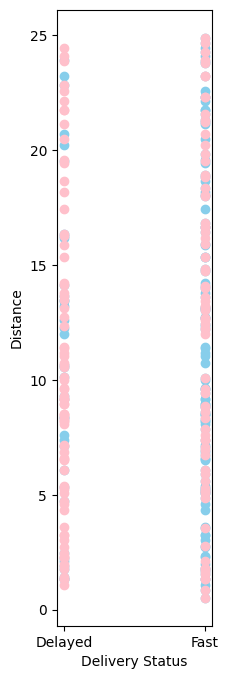

In [145]:
plt.figure(figsize=(2,8))
plt.scatter(y2_pred, x2_test['Distance'], color='skyblue', label='Predicted Status')
plt.scatter(y2_test, x2_test['Distance'], color='pink', label='Actual Status')
plt.xlabel('Delivery Status')
plt.ylabel('Distance')
plt.legend
plt.show()

<h1>Phase 3:<br>Reporting and Insights</h1>contains 2 steps

<h3>Step 6 - Model Evaluation and Comparison</h3>

In [146]:
accuracy = accuracy_score(y2_test, y2_pred)
precision = precision_score(y2_test, y2_pred, pos_label='Delayed')
recall = recall_score(y2_test, y2_pred, pos_label='Delayed')
f1 = f1_score(y2_test, y2_pred, pos_label='Delayed')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


Accuracy: 0.5125
Precision: 0.5526315789473685
Recall: 0.25609756097560976
F1-score: 0.35



ROC Curve for Logistic Regression<br>
Receiver Operating Characteristic<br>
It is a graphical plot used to evaluate the performance of a binary classification model (has 2 outputs only) (like your logistic regression).<br>
The ROC curve shows the trade-off between the True Positive Rate (x-axis) (Sensitivity/Recall) and the False Positive Rate (y-axis) (1 - Specificity) at various threshold settings.<br>
True Positive Rate = True Positives/(True Positives + False Negatives)<br>
True Positive Rate = False Positives/(False Positives + True Negatives)

In [147]:
y2_test

143    Delayed
40        Fast
199    Delayed
30     Delayed
123    Delayed
        ...   
65     Delayed
120    Delayed
105    Delayed
186       Fast
166       Fast
Name: Delivery_Status, Length: 160, dtype: object

These numbers are the original DataFrame indices for each test sample, and the value ("Delayed" or "Fast") is the true label for that sample.<br>
for example : <br>
Row 180 in your original DataFrame has Delivery_Status = "Delayed"<br>
Row 37 in your original DataFrame has Delivery_Status = "Fast"<br>
Row 43 in your original DataFrame has Delivery_Status = "Delayed"

numbers printed ramdomly because train_test_split shuffles the data before splitting it into train and test sets

In [148]:
lb = LabelBinarizer()
# converts y into numbers
# delayed = 1, fast = 0
y = lb.fit_transform(y2)
y=y.ravel()
x = x2.values

In [149]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [150]:
model1.fit(x_train, y_train)
y_pred = model1.predict(x_test)
y_pred

array([0.74721902, 0.62297433, 0.41305978, 0.48218291, 0.50374511,
       0.43671382, 0.47212111, 0.47694589, 0.33238938, 0.66797094,
       0.7301367 , 0.65283339, 0.66327105, 0.24720314, 0.33677952,
       0.61057496, 0.62504165, 0.62153787, 0.70096819, 0.30291639,
       0.41590765, 0.57202788, 0.5172066 , 0.47816395, 0.60055172,
       0.44421179, 0.49317894, 0.54151593, 0.6482102 , 0.4197626 ,
       0.49907004, 0.39493781, 0.45822207, 0.4439889 , 0.59818562,
       0.42465846, 0.60742907, 0.339049  , 0.58430785, 0.25389288])

In [151]:
y_pred_class = y_pred.round().astype(int).clip(0,2)
y_pred_class

array([1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0])

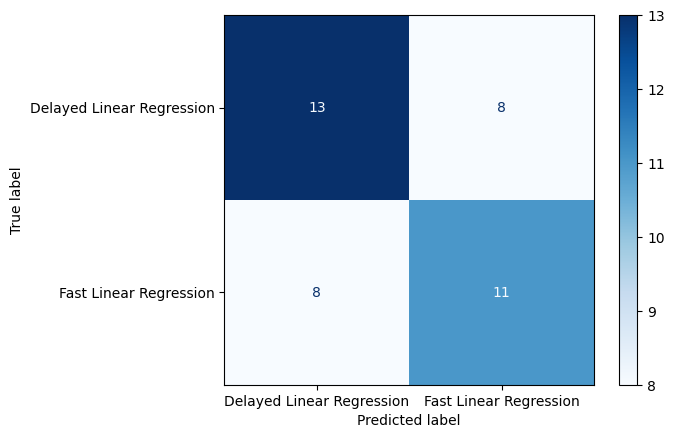

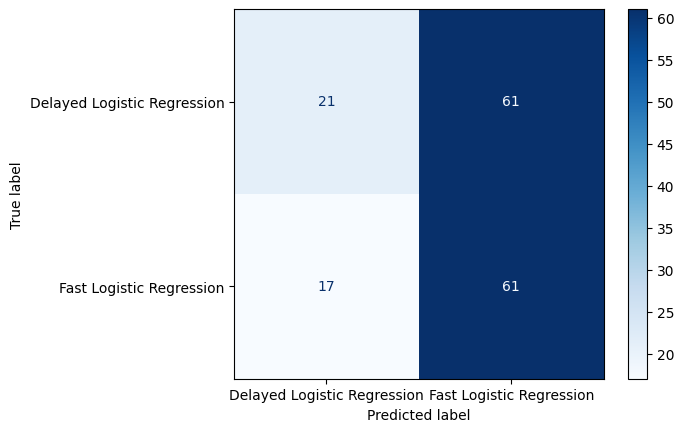

In [157]:
# Confusion Matrices
cm_lin = confusion_matrix(y_test, y_pred_class)
ConfusionMatrixDisplay(confusion_matrix=cm_lin, display_labels=['Delayed Linear Regression', 'Fast Linear Regression']).plot(cmap='Blues')

cm_log = confusion_matrix(y2_test, y2_pred, labels=['Delayed', 'Fast'])
ConfusionMatrixDisplay(confusion_matrix=cm_log, display_labels=['Delayed Logistic Regression', 'Fast Logistic Regression']).plot(cmap='Blues')


In [159]:
# Classification Reports
cr_lin = classification_report(y_test, y_pred_class, target_names=['Delayed', 'Fast'])
cr_log = classification_report(y2_test, y2_pred, target_names=['Delayed', 'Fast'])

# Print Classification Reports
print("Linear Regression Classification Report:\n", cr_lin)
print("Logistic Regression Classification Report:\n", cr_log)

Linear Regression Classification Report:
               precision    recall  f1-score   support

     Delayed       0.62      0.62      0.62        21
        Fast       0.58      0.58      0.58        19

    accuracy                           0.60        40
   macro avg       0.60      0.60      0.60        40
weighted avg       0.60      0.60      0.60        40

Logistic Regression Classification Report:
               precision    recall  f1-score   support

     Delayed       0.55      0.26      0.35        82
        Fast       0.50      0.78      0.61        78

    accuracy                           0.51       160
   macro avg       0.53      0.52      0.48       160
weighted avg       0.53      0.51      0.48       160



Logistic Regression will usually perform much better on classification tasks.<br>
Linear Regression, when rounded to the nearest class, might perform poorly due to treating labels as numeric values (e.g., 0, 1, 2).

Linear Regression performed better overall on this dataset:<br>
Higher accuracy, More balanced precision, recall, and f1-score<br>
Especially better on smaller dataset (40 samples)

Logistic Regression had more data (160 samples) and still underperformed.<br>
Features may not separate classes well<br>
Or the model needs tuning (e.g., better feature scaling, regularization, or hyperparameters)

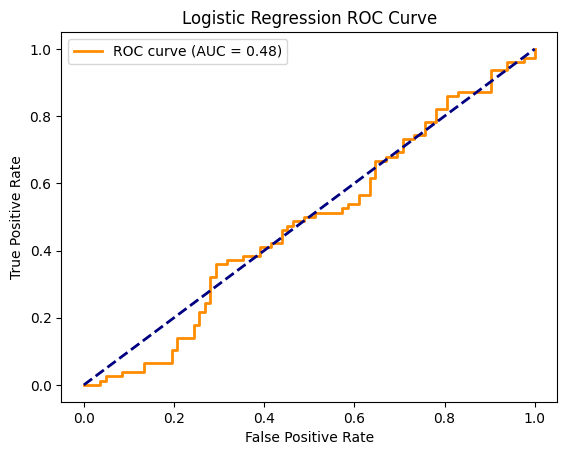

In [153]:
y2_test_bin = lb.fit_transform(y2_test)
# converts y2_test into numbers
# delayed = 1, fast = 0
if y2_test_bin.shape[1] == 1: # check if y2_test is binary
    # if y2_test is binary, then we need to convert it to 1D
    y2_test_bin = y2_test_bin.ravel() # convert to 1D array
    y2_pred_prob = model2.predict_proba(x2_test)[:, list(model2.classes_).index('Delayed')] # get the probability of 'Delayed' class means that it finds which column is "Delayed".
else: # if y2_test is not binary
    # If we had more than one column (multi-class), we just take the second column (index 1).
    y2_pred_prob = model2.predict_proba(x2_test)[:, 1] # get the probability of 'Delayed' class

fpr, tpr, thresholds = roc_curve(y2_test_bin, y2_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve')
plt.legend()
plt.show()

<h3>Step 7 - Actionable Insights</h3>

In [154]:
print("--> Optimize delivery routes using real-time traffic data and route optimization tools to reduce delivery times,\n \tespecially for longer distances or during high-traffic conditions.")
print("--> Increase staffing levels during identified rush hours and periods of high traffic to ensure timely deliveries and reduce delays.")
print("--> Provide regular training and upskilling for delivery staff to improve their efficiency, navigation, and customer interaction,\n \tleading to faster and more reliable deliveries.")

--> Optimize delivery routes using real-time traffic data and route optimization tools to reduce delivery times,
 	especially for longer distances or during high-traffic conditions.
--> Increase staffing levels during identified rush hours and periods of high traffic to ensure timely deliveries and reduce delays.
--> Provide regular training and upskilling for delivery staff to improve their efficiency, navigation, and customer interaction,
 	leading to faster and more reliable deliveries.
